In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpmax, fpgrowth

c:\Users\Romain\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\Romain\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [67]:
dataset = [ 
    ['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
    ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
    ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
    ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']
]


In [68]:
te = TransactionEncoder()


In [69]:
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [70]:
FI = apriori(df, min_support=0.5, use_colnames=True)

print("FI type : ", type(FI))
print("FI columns : ", FI.columns)
print("FI : ", FI)

FI type :  <class 'pandas.core.frame.DataFrame'>
FI columns :  Index(['support', 'itemsets'], dtype='object')
FI :      support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Eggs, Onion)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Kidney Beans, Onion)
9       0.6       (Kidney Beans, Yogurt)
10      0.6  (Kidney Beans, Eggs, Onion)


In [71]:
%timeit -n 100 -r 10 apriori(df, min_support=0.5)

1.5 ms ± 27 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [72]:
GFI = fpgrowth(df, min_support=0.5, use_colnames=True)
%timeit -n 100 -r 10 fpgrowth(df, min_support=0.5)

565 µs ± 24.5 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [73]:
MFI = fpmax(df, min_support=0.5, use_colnames=True)
%timeit -n 100 -r 10 fpmax(df, min_support=0.5)
MFI

573 µs ± 20.3 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


,support,itemsets
0,0.6,"(Milk, Kidney Beans)"
1,0.6,"(Kidney Beans, Eggs, Onion)"
2,0.6,"(Kidney Beans, Yogurt)"


In [74]:
AR = association_rules(FI, metric="confidence", min_threshold=0.8)
for index, row in AR.iterrows():
    print(row['antecedents'], " -> ", row['consequents'], " : ", row['confidence'])

frozenset({'Eggs'})  ->  frozenset({'Kidney Beans'})  :  1.0
frozenset({'Kidney Beans'})  ->  frozenset({'Eggs'})  :  0.8
frozenset({'Onion'})  ->  frozenset({'Eggs'})  :  1.0
frozenset({'Milk'})  ->  frozenset({'Kidney Beans'})  :  1.0
frozenset({'Onion'})  ->  frozenset({'Kidney Beans'})  :  1.0
frozenset({'Yogurt'})  ->  frozenset({'Kidney Beans'})  :  1.0
frozenset({'Onion', 'Kidney Beans'})  ->  frozenset({'Eggs'})  :  1.0
frozenset({'Eggs', 'Onion'})  ->  frozenset({'Kidney Beans'})  :  1.0
frozenset({'Onion'})  ->  frozenset({'Eggs', 'Kidney Beans'})  :  1.0


In [75]:
retail_ds = pd.read_csv('datasets/retail_dataset.csv',sep=',',header=0)

In [76]:
cleaned_ds = []
for i in range(len(retail_ds)):
    cleaned_row = [item for item in retail_ds.values[i, :] if str(item) != 'nan']
    cleaned_ds.append(cleaned_row)
te_ary = te.fit(cleaned_ds).transform(cleaned_ds)
cleaned_df = pd.DataFrame(te_ary, columns=te.columns_)
cleaned_df.head(10)

,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine
0,False,True,True,True,True,True,False,True,True
1,False,True,True,True,False,True,True,True,True
2,False,False,True,False,True,True,True,False,True
3,False,False,True,False,True,True,True,False,True
4,False,False,False,False,False,True,False,True,True
5,True,True,False,True,True,False,True,True,True
6,False,False,True,False,True,False,False,True,True
7,True,True,False,True,False,False,True,True,False
8,False,True,True,True,True,False,True,False,True
9,True,False,True,True,True,True,False,True,True


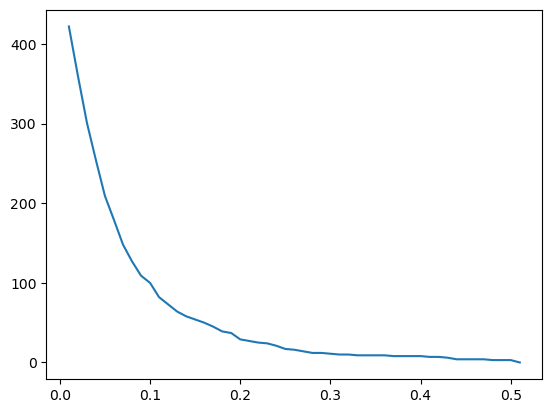

In [77]:
done = False
support = 0.01
x = []
y = []
while not done:
    FI = apriori(cleaned_df, min_support=support, use_colnames=True)
    x.append(support)
    y.append(len(FI))
    if len(FI) == 0:
        done = True
    else:
        support += 0.01

plt.plot(x, y)


In [78]:
FI = apriori(cleaned_df, min_support=0.03, use_colnames=True)
print("FI type : ", type(FI))
print("FI columns : ", FI.columns)
print("FI sample: ", FI.head(10))

eggs_contained_items = FI[FI['itemsets'].apply(lambda x: 'Eggs' in x)]
eggs_and_meat_contained_items = eggs_contained_items[eggs_contained_items['itemsets'].apply(lambda x: 'Meat' in x)]

print(eggs_and_meat_contained_items)

FI type :  <class 'pandas.core.frame.DataFrame'>
FI columns :  Index(['support', 'itemsets'], dtype='object')
FI sample:      support        itemsets
0  0.425397         (Bagel)
1  0.504762         (Bread)
2  0.501587        (Cheese)
3  0.406349        (Diaper)
4  0.438095          (Eggs)
5  0.476190          (Meat)
6  0.501587          (Milk)
7  0.361905        (Pencil)
8  0.438095          (Wine)
9  0.279365  (Bread, Bagel)
      support                             itemsets
35   0.266667                         (Meat, Eggs)
63   0.092063                  (Meat, Eggs, Bagel)
84   0.092063                  (Meat, Bread, Eggs)
99   0.215873                 (Meat, Cheese, Eggs)
109  0.085714                 (Diaper, Eggs, Meat)
119  0.177778                   (Meat, Eggs, Milk)
120  0.079365                 (Meat, Eggs, Pencil)
121  0.149206                   (Meat, Eggs, Wine)
140  0.044444           (Meat, Bread, Eggs, Bagel)
155  0.063492          (Meat, Cheese, Bagel, Eggs)
165  0.05

In [79]:
AR = association_rules(FI, metric="confidence",min_threshold=0.75)

cheese_as_consquent = AR[AR['consequents'].apply(lambda x: 'Cheese' in x)]

print(cheese_as_consquent)

                      antecedents consequents  antecedent support  \
1                    (Meat, Eggs)    (Cheese)            0.266667   
2                    (Milk, Eggs)    (Cheese)            0.244444   
3                    (Meat, Milk)    (Cheese)            0.244444   
9              (Meat, Eggs, Milk)    (Cheese)            0.177778   
11             (Milk, Eggs, Wine)    (Cheese)            0.136508   
13             (Meat, Wine, Milk)    (Cheese)            0.126984   
17    (Diaper, Eggs, Bagel, Meat)    (Cheese)            0.050794   
20  (Diaper, Pencil, Bagel, Wine)    (Cheese)            0.041270   
31       (Meat, Eggs, Wine, Milk)    (Cheese)            0.092063   

    consequent support   support  confidence      lift  leverage  conviction  
1             0.501587  0.215873    0.809524  1.613924  0.082116    2.616667  
2             0.501587  0.196825    0.805195  1.605293  0.074215    2.558519  
3             0.501587  0.203175    0.831169  1.657077  0.080564    2.95

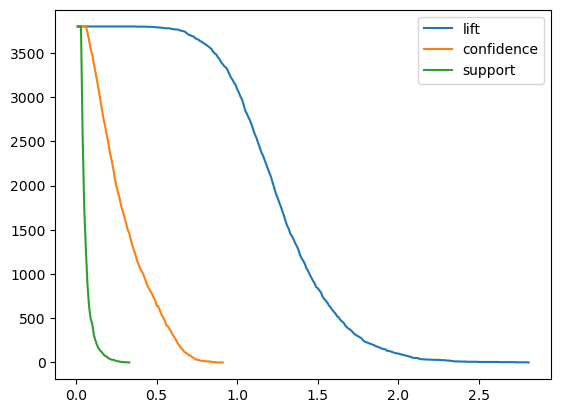

In [80]:
metrics = ['lift', 'confidence', 'support']
for metric in metrics:
    done = False
    metric_val = 0.01
    x = []
    y = []
    while not done:
        AR = association_rules(FI, metric=metric, min_threshold=metric_val)
        x.append(metric_val)
        y.append(len(AR))
        if len(AR) == 0:
            done = True
        else:
            metric_val += 0.01

    plt.plot(x, y, label=metric)
    plt.legend()